For this tutorial, we will use the CIFAR10 dataset. It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.Training an image classifier

# We will do the following steps in order:

- Load and normalize the CIFAR10 training and test datasets using torchvision

- Define a Convolutional Neural Network

- Define a loss function

- Train the network on the training data

- Test the network on the test data

In [1]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

In [3]:
batch_size = 4

trainSet = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testSet = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

trainLoader = torch.utils.data.DataLoader(trainSet, batch_size=batch_size, shuffle=True, num_workers=2)
testLoader = torch.utils.data.DataLoader(testSet, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


(3, 36, 138)


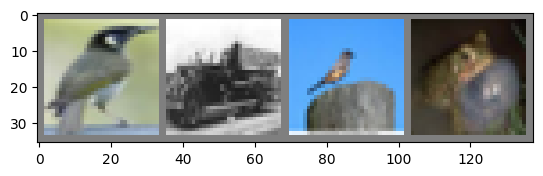

bird  truck bird  frog 


In [13]:
import matplotlib.pyplot as plt 
import numpy as np

def imgShow(img):
    img = img / 2 + 0.5
    npImg = img.numpy()
    print(np.shape(npImg))
    plt.imshow(np.transpose(npImg, (1,2,0)))
    # plt.imshow(npImg)
    plt.show()
    
# get some random training images
dataiter = iter(trainLoader)
images, labels = next(dataiter)

# show images
imgShow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [19]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 80)
        self.fc3 = nn.Linear(80, 10)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

        

In [20]:
import torch.optim as optim

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    
    for i, data in enumerate(trainLoader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.197
[1,  4000] loss: 1.921
[1,  6000] loss: 1.690
[1,  8000] loss: 1.574
[1, 10000] loss: 1.517
[1, 12000] loss: 1.466
[2,  2000] loss: 1.395
[2,  4000] loss: 1.374
[2,  6000] loss: 1.356
[2,  8000] loss: 1.329
[2, 10000] loss: 1.309
[2, 12000] loss: 1.302
[3,  2000] loss: 1.231
[3,  4000] loss: 1.211
[3,  6000] loss: 1.233
[3,  8000] loss: 1.206
[3, 10000] loss: 1.185
[3, 12000] loss: 1.178
[4,  2000] loss: 1.096
[4,  4000] loss: 1.115
[4,  6000] loss: 1.122
[4,  8000] loss: 1.122
[4, 10000] loss: 1.126
[4, 12000] loss: 1.118
[5,  2000] loss: 1.007
[5,  4000] loss: 1.056
[5,  6000] loss: 1.061
[5,  8000] loss: 1.055
[5, 10000] loss: 1.064
[5, 12000] loss: 1.064
[6,  2000] loss: 0.968
[6,  4000] loss: 0.986
[6,  6000] loss: 0.981
[6,  8000] loss: 0.994
[6, 10000] loss: 1.018
[6, 12000] loss: 1.013
[7,  2000] loss: 0.926
[7,  4000] loss: 0.917
[7,  6000] loss: 0.928
[7,  8000] loss: 0.947
[7, 10000] loss: 0.966
[7, 12000] loss: 0.976
[8,  2000] loss: 0.862
[8,  4000] 

In [22]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

(3, 36, 138)


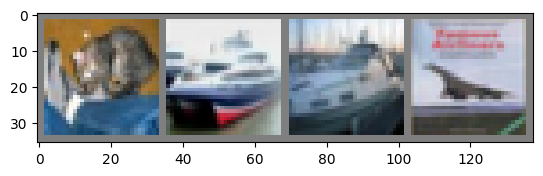

GroundTruth:  cat   ship  ship  plane


In [24]:
dataiter = iter(testLoader)
images, labels = next(dataiter)

# print images
imgShow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [25]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [26]:
outputs = net(images)

In [27]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


In [28]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testLoader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 61 %
